In [1]:
import xarray as xr, matplotlib.pyplot as plt, numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????


In [8]:
# import custom functions
import sys 
sys.path.append('/home/563/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot

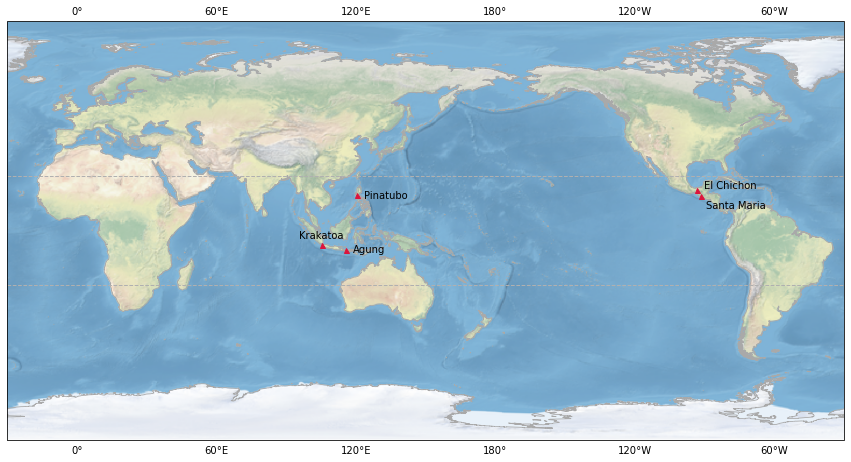

In [2]:
# example with grid lines
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
ax.set_global() # make the map global rather than zoom into any local data that is plotted
ax.stock_img() # fills in colour for oceans and continents 
ax.coastlines(resolution='10m', color='darkgrey', lw=0.8)

K_lon, K_lat = 105.4, -6.11
S_lon, S_lat = -91.55, 14.76
A_lon, A_lat = 115.51, -8.34
E_lon, E_lat = -93.23, 17.36
P_lon, P_lat = 120.34, 15.14

plt.plot(K_lon, K_lat, '^', color='crimson',markersize='5', transform=ccrs.PlateCarree()) # krakatoa
plt.text(K_lon -10, K_lat + 3, 'Krakatoa', transform=ccrs.PlateCarree())

plt.plot(S_lon, S_lat, '^', color='crimson',markersize='5', transform=ccrs.PlateCarree()) # santa maria
plt.text(S_lon + 2, S_lat -5, 'Santa Maria', transform=ccrs.PlateCarree())

plt.plot(A_lon, A_lat, '^', color='crimson',markersize='5', transform=ccrs.PlateCarree()) # agung
plt.text(A_lon + 3, A_lat - 1, 'Agung', transform=ccrs.PlateCarree())

plt.plot(E_lon, E_lat, '^', color='crimson',markersize='5', transform=ccrs.PlateCarree()) # el chichon
plt.text(E_lon + 3, E_lat + 1, 'El Chichon', transform=ccrs.PlateCarree())

plt.plot(P_lon, P_lat, '^', color='crimson',markersize='5', transform=ccrs.PlateCarree()) # pinatubo
plt.text(P_lon + 3, P_lat-1, 'Pinatubo', transform=ccrs.PlateCarree())

# ax.gridlines(xlocs=range(-180,181,20), ylocs=range(-80,81,20),draw_labels=True)
# ax.gridlines(xlocs=range(-160,181,20), ylocs=range(-80,81,20),draw_labels=True)
tropics = ax.gridlines(ylocs=[-23.43691,23.43691],draw_labels=True,linewidth=1,linestyle='--', edgecolor='darkgrey')
tropics.xlines=False

# ax.text(0,-0.07,'Longitude', transform=ax.transAxes, ha='left')
# ax.text(-0.05,0,'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')
plt.savefig('volcano_locations.png', dpi=300)

In [4]:
# import land fraction data
landfrac_ds = xr.open_dataset('/home/563/kb6999/Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-01-01 01:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 01:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-21.04/lib/python3.8/site-packages/xarray/core/indexing.py:572: SerializationWarning: Unable to decode time 

In [5]:
land_Aus = landmask.data.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.data==1, drop=True)
land_EA = landmask.data.sel(lat=slice(-50,-10), lon=slice(140,155)).where(landmask.data==1, drop=True)

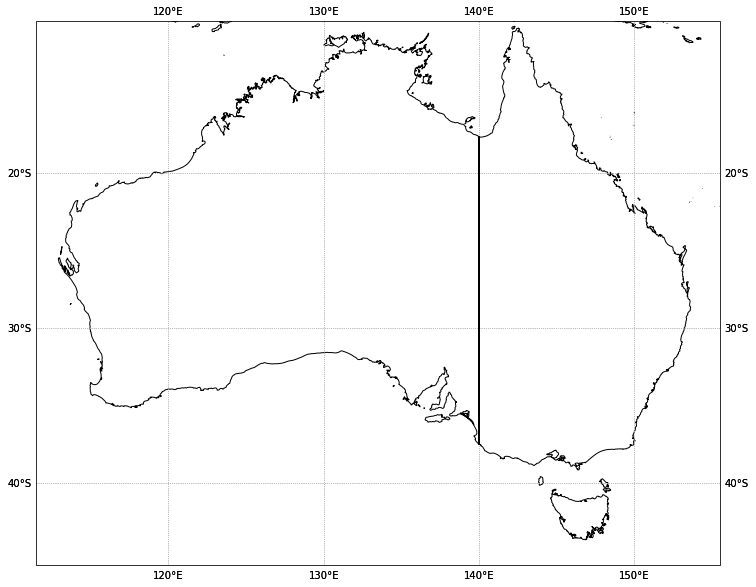

In [6]:
data = land_Aus
EA_lon0, EA_lat0 = 140, -37.5
EA_lon1, EA_lat1 = 140, -17.7


fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.stock_img() # fills in colour for oceans and continents 
img_extent = ([EA_lon0, EA_lon1], [EA_lat0, EA_lat1])
ax.coastlines(resolution='10m', color='black')
ax.set_extent([data.lon[0] - 2.5, data.lon[-1] + 2.5, data.lat[0] - 2.5, data.lat[-1] + 1], crs=ccrs.PlateCarree())
plt.plot([EA_lon0, EA_lon1], [EA_lat0, EA_lat1], color='k', linewidth=2, transform=ccrs.PlateCarree()) # el chichon
#plt.fill()
#land_EA.plot(color='lightyellow')

ax.gridlines(xlocs=range(-180,181,10), ylocs=range(-80,81,10),draw_labels=True, lw=1, linestyle=':', edgecolor='darkgrey')
ax.gridlines(xlocs=range(-160,181,10), ylocs=range(-80,81,10),draw_labels=True, lw=1, linestyle=':', edgecolor='darkgrey')

# plt.savefig('Map_eastern_Aus.png', dpi=300)

In [9]:
# plot of Aus monthly model mean temperature
fig = fplot.spatial_plot(2, 2, K_mmm_mon_Aus.tas, cmax_tas, K_dates, titles, 'RdBu_r', f'Temperature anomaly [{deg}C]', 1)

fig.set_figwidth(12)
fig.set_figheight(14) # these two parameters change the figure height and width 

# plt.savefig('spatial_tas_Aus.png', dpi=300, bbox_inches='tight')

NameError: name 'K_mmm_mon_Aus' is not defined

# map of stations

In [10]:
obs_path = '/g/data/w48/kb6999/Observations/obs_netcdfs_T/'
# open daily T data from 5 stations 
daily_T = xr.open_dataset(f'{obs_path}Daily_T_Aus_5S.nc')
daily_T 

<xarray.Dataset>
Dimensions:  (station: 5, time: 15705)
Coordinates:
  * time     (time) datetime64[ns] 1878-01-01 1878-01-02 ... 1920-12-31
  * station  (station) object 'Adelaide (030420)' ... 'Sydney (066062)'
Data variables:
    Tmin     (station, time) float64 ...
    Tmax     (station, time) float64 ...

In [11]:
# set the [lat, lon] for each station - sourced from Google
adelaide = [-34.9285, 138.6007]
armidale = [-30.5036, 151.6523]
cape_otway = [-38.8340, 143.5241]
melbourne = [-37.8136, 144.9631]
sydney = [-33.8688, 151.2093]

In [12]:
# put the lat lon for station into an array
i = 0
stat_lat = [adelaide[i], armidale[i], cape_otway[i], melbourne[i], sydney[i]]
i=1
stat_lon = [adelaide[i], armidale[i], cape_otway[i], melbourne[i], sydney[i]]

In [28]:
station_names = ['Adelaide', 'Armidale', 'Cape Otway', 'Melbourne', 'Sydney']

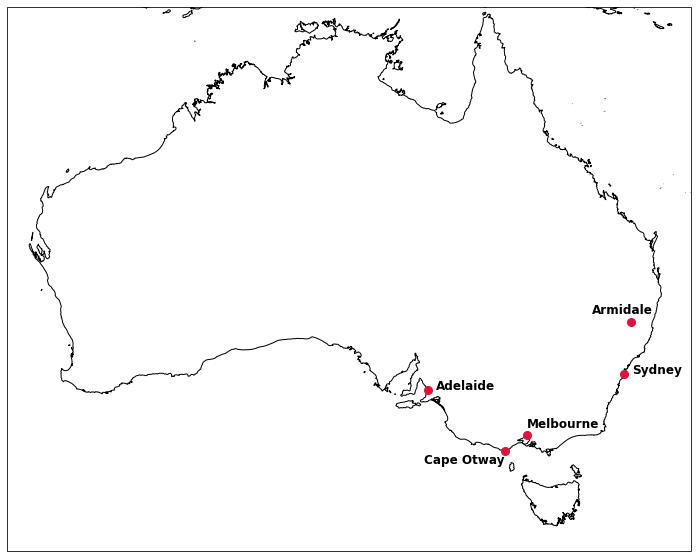

In [56]:
# example with grid lines
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=150))
# set the axes to include australia
ax.set_extent([land_Aus.lon[0] - 2.5, land_Aus.lon[-1] + 2.5, land_Aus.lat[0] - 2.5, land_Aus.lat[-1] + 1], crs=ccrs.PlateCarree())

# ax.stock_img() # fills in colour for oceans and continents 
ax.coastlines(resolution='10m', color='k', lw=1)

# plot circle for each station location
for s, val in enumerate(stat_lat):
    plt.plot(stat_lon[s], stat_lat[s], 'o', color='crimson',markersize='8', transform=ccrs.PlateCarree()) # krakatoa

# move the text for each station
# adelaide
plt.text(stat_lon[0]+0.5, stat_lat[0], station_names[0], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
#armidale
plt.text(stat_lon[1]-2.5, stat_lat[1]+0.5, station_names[1], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
# cape otway
plt.text(stat_lon[2]-5.2, stat_lat[2]-0.8, station_names[2], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
# melbourne
plt.text(stat_lon[3], stat_lat[3]+0.5, station_names[3], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())
#sydney
plt.text(stat_lon[4]+0.5, stat_lat[4], station_names[4], fontsize='large', fontweight='semibold', transform=ccrs.PlateCarree())


# ax.gridlines(xlocs=range(-180,181,20), ylocs=range(-80,81,20),draw_labels=True)
# ax.gridlines(xlocs=range(-160,181,20), ylocs=range(-80,81,20),draw_labels=True)
# tropics = ax.gridlines(ylocs=[-23.43691,23.43691],draw_labels=True,linewidth=1,linestyle='--', edgecolor='darkgrey')
# tropics.xlines=False

# ax.text(0,-0.07,'Longitude', transform=ax.transAxes, ha='left')
# ax.text(-0.05,0,'Latitude', transform=ax.transAxes, rotation='vertical', va='bottom')
plt.savefig('station_locations.png', dpi=300)